In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from interfaces.db import DB

In [4]:
db = DB()

In [58]:
# Funding rounds
frs = db.get_table('graph.Nodes_N_FundingRound')

In [59]:
columns = ['FundingRoundID', 'FundingRoundType', 'FundingRoundName', 'FundingRoundDate', 'FundingCurrency', 'FundingAmount', 'FundingAmount_USD', 'FundingAmount_CHF', 'FundingAmount_PresentValue_USD', 'FundingAmount_PresentValue_CHF', 'PostFundingValuationCurrency', 'PostFundingValuation', 'PostFundingValuation_USD', 'City', 'Region', 'USStateCode', 'CountryISO3', 'CB_InvestorCount', 'CB_Rank', 'CB_Permalink', 'CB_URL', 'NodeID', 'MD5CheckSum']

frs = pd.DataFrame(frs, columns=columns)

In [60]:
frs = frs.sort_values(by='FundingRoundDate')

In [63]:
min_year = 1990
max_year = 2022

frs = frs[(pd.to_datetime(f'{min_year}-01-01').date() <= frs['FundingRoundDate']) & (frs['FundingRoundDate'] < pd.to_datetime(f'{max_year}-01-01').date())]

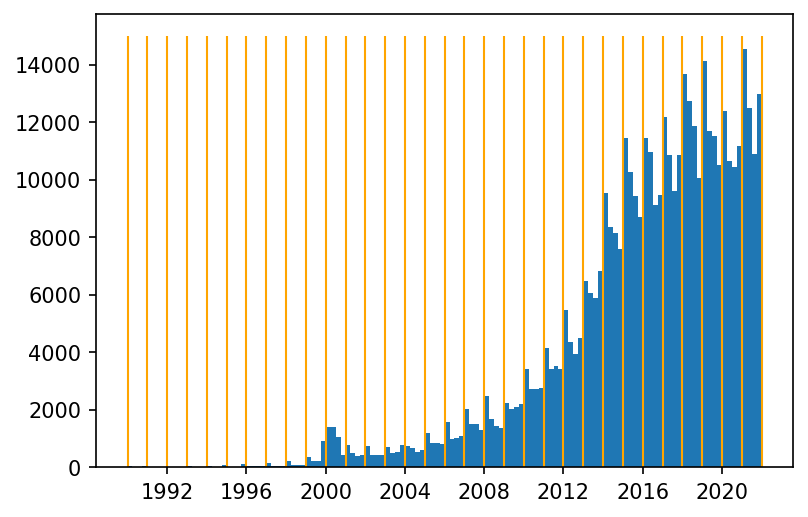

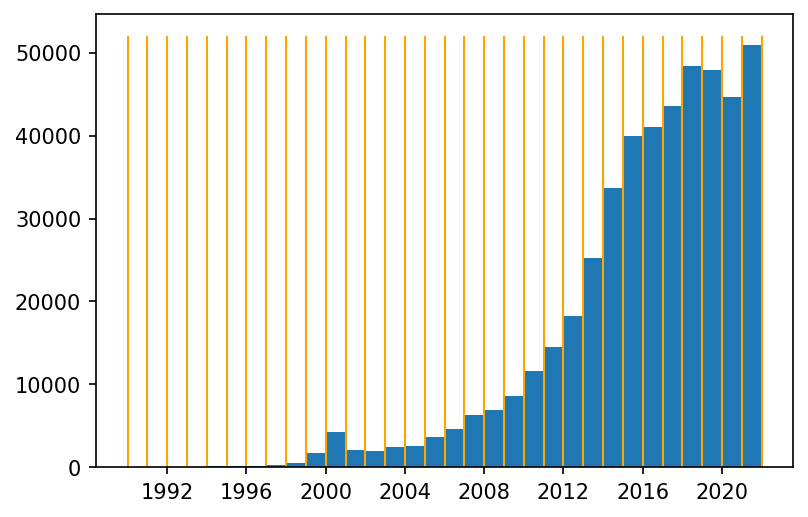

In [68]:
fig, ax = plt.subplots(dpi=150)

# Quarterly bins
n_bins = 4 * (max_year - min_year)
ax.hist(frs['FundingRoundDate'], bins=n_bins)

new_years = [pd.to_datetime(f'{year}-01-01').date() for year in range(min_year, max_year + 1)]
ax.vlines(new_years, ymin=0, ymax=15000, color='orange', linewidth=1.0)

fig, ax = plt.subplots(dpi=150)

# Yearly bins
n_bins = max_year - min_year
ax.hist(frs['FundingRoundDate'], bins=n_bins)

new_years = [pd.to_datetime(f'{year}-01-01').date() for year in range(min_year, max_year + 1)]
ax.vlines(new_years, ymin=0, ymax=52000, color='orange', linewidth=1.0)